<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-张量与矩阵、向量、标量的关系是怎么样的？" data-toc-modified-id="1-张量与矩阵、向量、标量的关系是怎么样的？-1">1 张量与矩阵、向量、标量的关系是怎么样的？</a></span></li><li><span><a href="#2-Variable“赋予”张量什么功能？" data-toc-modified-id="2-Variable“赋予”张量什么功能？-2">2 Variable“赋予”张量什么功能？</a></span><ul class="toc-item"><li><span><a href="#0.4.0-版本后Variable已并入Tensor" data-toc-modified-id="0.4.0-版本后Variable已并入Tensor-2.1">0.4.0 版本后Variable已并入Tensor</a></span></li></ul></li><li><span><a href="#3-采用torch.from_numpy创建张量，并打印查看ndarray和张量数据的地址" data-toc-modified-id="3-采用torch.from_numpy创建张量，并打印查看ndarray和张量数据的地址-3">3 采用torch.from_numpy创建张量，并打印查看ndarray和张量数据的地址</a></span><ul class="toc-item"><li><span><a href="#torch.from_numpy(ndarray)" data-toc-modified-id="torch.from_numpy(ndarray)-3.1">torch.from_numpy(ndarray)</a></span><ul class="toc-item"><li><span><a href="#3.1-创建ndarray数组" data-toc-modified-id="3.1-创建ndarray数组-3.1.1">3.1 创建ndarray数组</a></span></li><li><span><a href="#3.2-ndarray转tensor" data-toc-modified-id="3.2-ndarray转tensor-3.1.2">3.2 ndarray转tensor</a></span></li><li><span><a href="#3.3-修改ndarray，对应tensor也发生改变" data-toc-modified-id="3.3-修改ndarray，对应tensor也发生改变-3.1.3">3.3 修改ndarray，对应tensor也发生改变</a></span></li></ul></li></ul></li><li><span><a href="#4-实现torch.normal()创建张量的四种模式" data-toc-modified-id="4-实现torch.normal()创建张量的四种模式-4">4 实现torch.normal()创建张量的四种模式</a></span><ul class="toc-item"><li><span><a href="#torch.normal()" data-toc-modified-id="torch.normal()-4.1">torch.normal()</a></span></li></ul></li></ul></div>

<font color=black size=2>内容与图片参考于：
<font color=gray size=2>
- 深度之眼 - pytorch框架班（余霆嵩老师课程）
- [超简单！pytorch入门教程（一）：Tensor](https://www.jianshu.com/p/5ae644748f21/) 
- [PyTorch 1.0 中文文档 & 教程](https://pytorch.apachecn.org/docs/1.0/)
</font>

### 1 张量与矩阵、向量、标量的关系是怎么样的？
张量为一个多维数组，是标量、向量、矩阵的高维拓展。

Tensor（张量）类似于NumPy的ndarray，但还可以在GPU上使用来加速计算。
- 标量(Scalar)：0阶（$r=0$）张量
- 向量(Vector)：1阶（$r=1$）张量
- 矩阵(Matrix)：2阶（$r=2$）张量

<center>
    矩阵为二阶张量，是三阶张量(Volume)的一个二维切面
</center>

---
### 2 Variable“赋予”张量什么功能？
#### 0.4.0 版本后Variable已并入Tensor

Variable是torch.autograd中的数据类型，主要用于封装Tensor，进行<font color='brown'>自动求导</font>
- data: 被包装的Tensor
- grad: data的梯度
- grad_fn: 创建Tensor的Function，是自动求导的关键
- requires_grad：指示是否需要梯度
- is_leaf：指示是否叶子结点

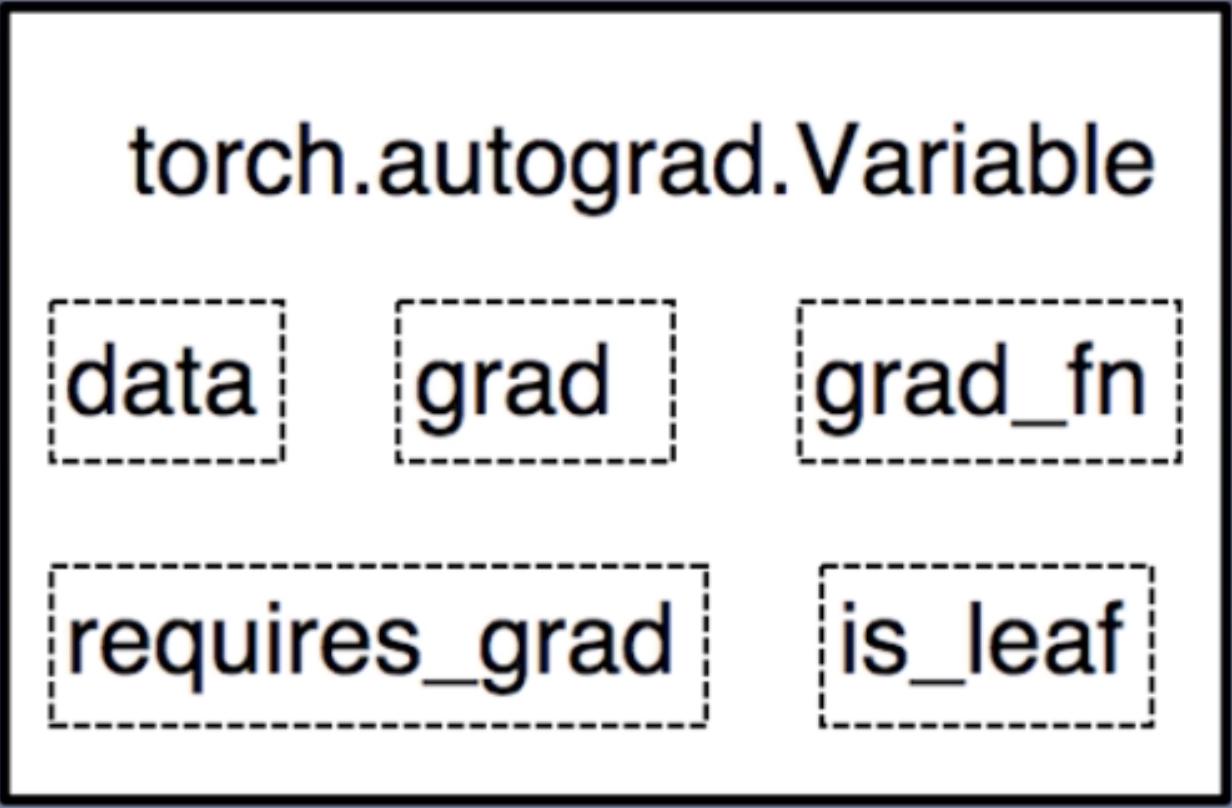

---
### 3 采用torch.from_numpy创建张量，并打印查看ndarray和张量数据的地址

#### torch.from_numpy(ndarray)
- 功能：从numpy创建tensor  
- 注意事项：从torch.from_numpy创建的tensor与原ndarray共享内存，当修改其中一个数据时，另外一个也将被改动

In [1]:
import numpy as np
import torch

##### 3.1 创建ndarray数组

In [2]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr, id(arr)

(array([[1, 2, 3],
        [4, 5, 6]]), 4597355824)

##### 3.2 ndarray转tensor

In [3]:
t = torch.from_numpy(arr)
t, id(t)

(tensor([[1, 2, 3],
         [4, 5, 6]]), 4918886832)

##### 3.3 修改ndarray，对应tensor也发生改变

In [4]:
arr[0, 0] = 99
arr, id(arr)

(array([[99,  2,  3],
        [ 4,  5,  6]]), 4597355824)

In [5]:
t, id(t)

(tensor([[99,  2,  3],
         [ 4,  5,  6]]), 4918886832)

In [6]:
t.data

tensor([[99,  2,  3],
        [ 4,  5,  6]])

### 4 实现torch.normal()创建张量的四种模式
#### torch.normal()
- 功能：生成正太分布（高斯分布）
---
<font color="blue">
四种模式
    
- 1. mean为标量，std为标量
- 2. mean为标量，std为张量 
- 3. mean为张量，std为标量
- 4. mean为张量，std为张量

In [13]:
# mean为标量，std为标量
mean = 0
std = 1
t_normal = torch.normal(mean, std, size=(4,5))
mean, std, t_normal

(0, 1, tensor([[ 0.6193, -0.2825,  0.2147, -0.2129,  0.0191],
         [-0.1127, -0.6949, -1.0361, -0.1792, -0.9448],
         [ 0.3972,  0.7101,  0.3024,  0.2404, -0.1433],
         [-1.1034,  0.0685, -0.6554, -1.5663, -1.6584]]))

In [8]:
# mean为标量，std为张量
mean = 1
std = torch.arange(1, 5, dtype=torch.float)
t_normal = torch.normal(mean, std)
mean, std, t_normal

(1, tensor([1., 2., 3., 4.]), tensor([ 0.7160, -1.0297,  2.3730,  0.0189]))

In [9]:
# mean为张量，std为标量
mean = torch.arange(1, 5, dtype=torch.float)
std = 1
t_normal = torch.normal(mean, std)
mean, std, t_normal

(tensor([1., 2., 3., 4.]), 1, tensor([2.7594, 1.4594, 2.3507, 4.5003]))

In [10]:
# mean为张量，std为张量
mean = torch.arange(1, 5, dtype=torch.float)
std = torch.arange(1, 5, dtype=torch.float)
t_normal = torch.normal(mean, std)
mean, std, t_normal

(tensor([1., 2., 3., 4.]),
 tensor([1., 2., 3., 4.]),
 tensor([1.0397, 1.1260, 7.1277, 2.6303]))